# Kinematic Equation #1

distance = speed (time)

This is really a differential equation

$dx = v dt$

So if we set $v = v_0$ and $x = x_0$ we can integrate just by taking baby steps

$$x_1 = x_0 + v_0 dt$$
$$x_2 = x_1 + v_0 dt$$
$$...$$
$$x_n = x_{n-1} + v_0 dt$$


In Python, it looks like this:

In [4]:
# Comments in Python start with "#". The Python interpreter ignores whatever is 
#    after the "#" so we can leave human readable notes here.
#
# import functions we'll need later. These modules are kind of the magic of python,
#   they allow for a relatively lightweight language that can be extended easily 
#   to have great power
#   For this example we use PyPlot, a popular graphing package. We also use numpy 
#   which gives access to a lot of math tools.
#
import numpy as np
from matplotlib import pyplot as plt
#
# define a function. This is one of the most important things in programming, writing a bit of code
#    that can be used later. It's a function, in this case a function of two variables.
#
def dx(v, dt): 
    return v*dt

x_1 = dx(3,0.001)   # Use the function
print(f"Our first differential dx = {x_1}")  # Display the result

Our first differential dx = 0.003


## Integrating: just count it up

We really have two differential equations

$$ t = t_0 + \Sigma_{i=0,n} dt $$

and

$$ x = x_0 + \Sigma_{i=0,n} vdt $$

Of course, you know that it's simpler to just write $\Delta x = v \Delta t$,
but when the equations become more complicated, we'll want to actually add up all the differentials.
So let's go:

This graph is generated from lists with 10 points.
The variable num_pts = 10


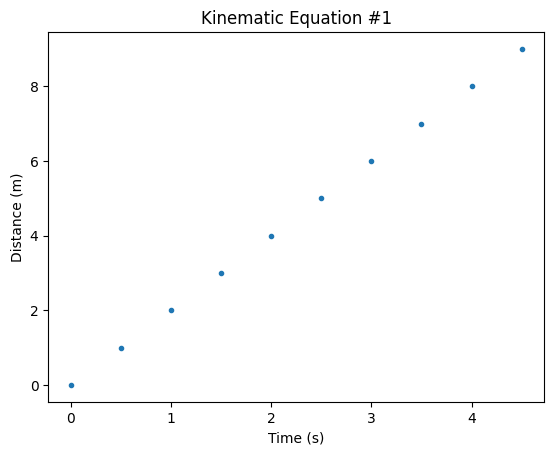

In [2]:
# set initial conditions
t_0 = 0
x_0 = 0
t_f = 5     # seconds
dt = 0.5    # seconds.     ___ TRY CHANGING THIS YOURSELF ____
v = 2       # meters / second
num_pts = int( (t_f - t_0) / dt )  # int() truncates floating point numbers

# create variables to store our results
t = list(np.zeros(num_pts))
x = list(np.zeros(num_pts))
x[0] = x_0

# add up the baby steps
for i in range(num_pts-1):
    t[i+1] = t[i] + dt
    x[i+1] = x[i] + dx(v, dt)

# graph the result
plt.plot(t,x,'.')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Kinematic Equation #1")
print(f"This graph is generated from lists with {len(x)} points.\nThe variable num_pts = {num_pts}")

## You did it

Wow, you can now use the computer to "integrate a differential equation" and to make a graph of the results.

This is a super power, one that would have been impressive when your parents were your age, and unthinkable when your grandparents were your age.

It might not seem like much, but very quickly we will see that if Newton and Leibnitz and Émilie du Châtelet had this power, they would have gotten over thier debates and moved onto bigger things _very_ quickly.

## Now let's add acceleration!

Remember how we moved through the kinematic equations.
First we did KE1 with $a=0$.
Then we added acceleration and wrote a very similar looking equation for KE2, $dv = a\ dt$,
which when added up over some long time is just KE2 $\Delta v = a \Delta t$,
but in our new world of adding things up just a little baby piece at a time it looks like this:

This graph is generated from lists with 100 points.
The variable num_pts = 100


/var/folders/88/2vk199j90w51r_stbszkzm400000gr/T/ipykernel_54332/1201047533.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


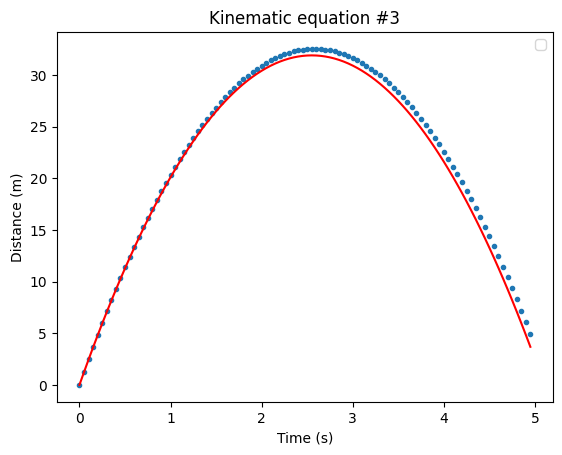

In [ ]:
def dv(a,dt):
    return a*dt

# set initial conditions
t_0 = 0
x_0 = 0
t_f = 5     # seconds
dt = 0.05  # seconds.     ___ TRY CHANGING THIS YOURSELF ____
v_0 = 25   # meters / second
a = -9.8  # meters / second^2
num_pts = int((t_f - t_0) / dt )  # int() truncates floating point numbers

# create variables to store our results
t = np.zeros(num_pts)
v = np.zeros(num_pts)
x = np.zeros(num_pts)
x[0] = x_0
v[0] = v_0

# add up the baby steps
for i in range(num_pts-1):
    t[i+1] = t[i] + dt
    v[i+1] = v[i] + dv(a, dt)
    x[i+1] = x[i] + dx(v[i], dt)  # NOTICE that (1) you still have access to dx() from earlier
                                  # and (2) now v changes eery step

# or do it the old way, using KE#3
x_theory = x_0 + v_0 * t + (1./2)*a*(t**2)
# graph the result
plt.plot(t,x,'.')
plt.plot(t, x_theory,'r-')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Kinematic equation #3")
print(f"This graph is generated from lists with {len(x)} points.\nThe variable num_pts = {num_pts}")

## Exercises

1. Hang-time

    Make a copy of the KE3 integrator above and then change it so that you can find the time that our projectile stays in the air. Hint: pick $t_f$ to be clearly too long, then add a test using an `if` statement.

1. Spring 

    Make another copy of the KE3 integrator. Change it so that instead of $a$ being constant throughout the run, $ma=-k/x$. Make the run long enough that you can see spring behavior.